In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt

class SymmetryFunction:
    def cutoff_func1(self, r_ij, r_c):
        if r_ij <= r_c:
            return 0.5 * (math.cos(((np.pi * r_ij) / r_c)) + 1)
        elif r_ij > r_c:
            return 0

    def cutoff_func2(self, r_ij, r_c):
        if r_ij <= r_c:
            return (np.tanh(1-(r_ij/r_c)))**3
        elif r_ij > r_c:
            return 0

    def radial_symmetry_function_2(self, eta, r_ij, r_shift, r_cutoff, cut_func_type=1):
        cutoff_func = ''
        if cut_func_type == 1:
           cutoff_func = self.cutoff_func1(r_ij, r_cutoff)
        return math.exp(-1 * eta * (r_ij - r_shift) ** 2) * cutoff_func
    
    def ang_symmetry_function_3(self, theta, lambdas, zeta, is_degree=True):
        if is_degree:
            theta = np.radians(theta)
        return 2**(1-zeta) * (1 + lambdas * np.cos(theta))**zeta


def plot_sf_radial(param: dict, rmax: float, ax, fontsize=12) -> None:
    """
    plot radial sf from param({eta: , rs: , rcut: })
    """
    sf = SymmetryFunction()
    r_ij = np.linspace(0, rmax, 100)
    ax.set_title(f'Radial symmetry functions: G2', fontsize=fontsize)
    ax.set_xlabel(f'r(Å)', fontsize=fontsize)
    # ax.set_ylabel(f'radial symmetry function : G2', fontsize=fontsize)
    ax.set_ylabel('$e^{-\eta}(R_{ij}-R_s)^2f_c(R_{ij})$', fontsize=fontsize)
    sf_value = [sf.radial_symmetry_function_2(eta=param['eta'], r_ij=k, r_shift=param['rs'], r_cutoff=param['rcut']) for k in r_ij]
    ax.plot(r_ij, sf_value, label=f'η: {param["eta"]}, Rs: {param["rs"]}')


def plot_sf_ang(params: dict, ax, fontsize=12) -> None:
    """
    plot radial sf from param({eta: , rs: , rcut: })
    """
    sf = SymmetryFunction()
    theta = np.linspace(0, 360)
    ax.set_title(f'Angular symmetry functions: G3', fontsize=fontsize)
    ax.set_xlabel(r'$\theta(°)$', fontsize=fontsize)
    # ax.set_ylabel(f'Angular symmetry function : G3', fontsize=fontsize)
    ax.set_ylabel(r'$2^{1-\zeta} (1+\lambda \cos\theta_{ijk})^\zeta$', fontsize=fontsize)
    ax.set_xlim(0, 360)
    y = sf.ang_symmetry_function_3(theta=theta, lambdas=params["lambda"], zeta=params["zeta"])
    ax.plot(theta, y, label=f'λ: {params["lambda"]}, ζ: {params["zeta"]}')

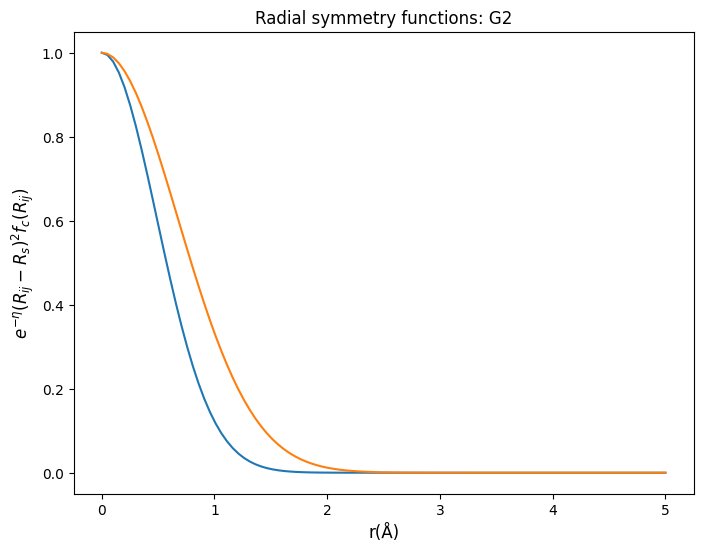

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_sf_radial(param={'eta': 2, 'rs': 0, 'rcut': 5}, rmax=5, ax=ax)
plot_sf_radial(param={'eta': 1, 'rs': 0, 'rcut': 5}, rmax=5, ax=ax)

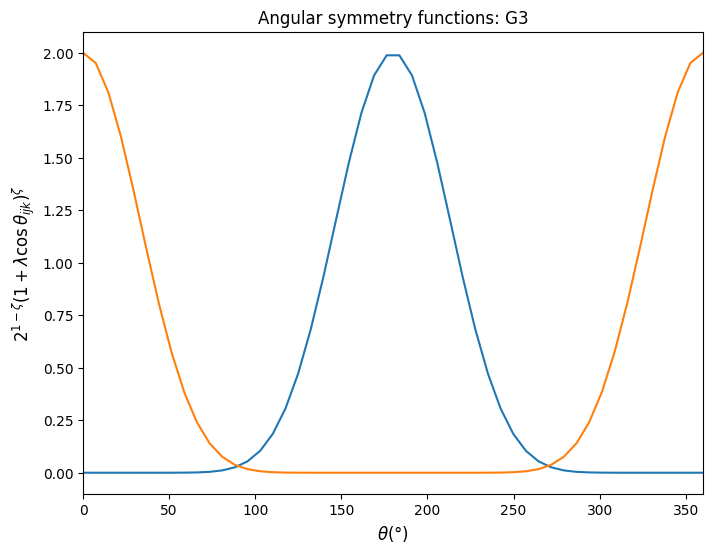

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_sf_ang(params={"lambda": -1.0, "zeta": 6.0}, ax=ax)
plot_sf_ang(params={"lambda": 1.0, "zeta": 6.0}, ax=ax)
# plot_sf_ang(param={'lambdas': 1, 'zeta': 2}, rmax=5, ax=ax)